In [1]:
import pandas as pd
import numpy as np
import re
import csv
import json
import requests
import random
import jieba
import plotly_express as px
import plotly.graph_objects as go
from wordcloud import WordCloud  # 词云图
import matplotlib.pyplot as plt
from plotly.graph_objects import Scatter, Bar


In [2]:
url = "https://travel.qunar.com/p-cs299782-xiamen-jingdian-1-1"
response = requests.get(url=url)
result = response.content.decode()


In [3]:
# 获取景点中文名
cn_title = re.findall('class="cn_tit">(.*?)<span', result, re.S)  # 参数有re.S，不会对\n进行中断
print(len(cn_title),cn_title)

10 ['鼓浪屿', '曾厝垵', '厦门大学', '中山路步行街', '环岛路', '顶澳仔猫街', '南普陀寺', '白城沙滩', '厦门园林植物园', '沙坡尾避风坞']


In [4]:
# 获取景点英文名
en_title = re.findall('<span class="en_tit">(.*?)</span>',result,re.S)
print(len(en_title), en_title)

10 ['Gulangyu Island', 'Zeng Cuo An Village', 'Xiamen University', 'Zhongshan Road Pedestrian Street', 'Huandao Road', "Ding'aozai", 'South Putuo Temple', 'Baicheng Beach', 'Xiamen Botanical Garden', 'Shapowei Wind Shelter']


In [5]:
# 获取每个景点的攻略数量
strategyCount = re.findall(
    '<div class="strategy_sum"><span class="icon_strategy" title="攻略"></span>(.*?)</div>', result, re.S)
print(len(strategyCount),strategyCount)

10 ['849', '2031', '2307', '1244', '1266', '0', '1480', '752', '335', '290']


In [6]:
# 获取每个景点的评论数量
commentCount = re.findall(
    '<div class="comment_sum"><span class="icon_comment" title="点评"></span>(.*?)</div>', result, re.S)
print(len(commentCount),commentCount)

10 ['31945', '5980', '12915', '3469', '5586', '51', '5484', '878', '2082', '310']


In [14]:
# 获取景点的排名
rank = re.findall(
    '<span class="ranking_sum">(.*?)</span>', result, re.S)
# 注意有些景点的排名不存在 需要特殊处理
for i in range(len(rank)):
    if rank[i]=="":
        rank[i] = 0
    else : 
        rank[i] = re.split('>', rank[i])[1]
    print(rank[i])


1
1
2
3
6
0
5
10
12
7


In [17]:
abstract = re.findall(
    '<div class="desbox">(.*?)</div>',result,re.S)
abstract

['世界文化遗产，特色店铺众多，建筑漂亮，生活气息和文艺范儿并重。',
 '厦门文创新地标，美食与文化的激情碰撞，去寻找文艺外表下充满生命力的古朴村落。',
 '依山傍海，中西结合的独特建筑风格，被誉为中国最美的大学之一。',
 '厦门地标式商业街，欣赏连排的骑楼式建筑，搜罗地道的闽南小吃，感受鹭岛的独特魅力。',
 '享受海边骑行的快乐，边骑边看美丽风景。',
 '',
 '全国闻名的佛教寺院，寺内的素斋和素饼都获过奖，还可登高望远。',
 '靠近厦大的免费沙滩，漫步、海边玩耍，这是天然的休闲公园。',
 '环境很好的植物园，有多种稀有植物景观，也适合周末爬山休闲。',
 '']

In [27]:
def parasData(data):
    res = []
    cn_title = re.findall('class="cn_tit">(.*?)<span',
                      result, re.S)  # 参数有re.S，不会对\n进行中断
    en_title = re.findall('<span class="en_tit">(.*?)</span>', result, re.S)
    strategyCount = re.findall(
        '<div class="strategy_sum"><span class="icon_strategy" title="攻略"></span>(.*?)</div>', result, re.S)
    commentCount = re.findall(
        '<div class="comment_sum"><span class="icon_comment" title="点评"></span>(.*?)</div>', result, re.S)
    rank = re.findall(
        '<span class="ranking_sum">(.*?)</span>', result, re.S)
    # 注意有些景点的排名不存在 需要特殊处理
    for i in range(len(rank)):
        if rank[i] == "":
            rank[i] = 0
        else:
            rank[i] = re.split('>', rank[i])[1]
    abstract = re.findall(
        '<div class="desbox">(.*?)</div>', result, re.S)
    return {"cn_title": cn_title, "en_title": en_title, "strategy": strategyCount, "comment": commentCount, "ranking": rank,"abstract": abstract}

AllData = []
for i in range(1,126):
    url = "https://travel.qunar.com/p-cs299782-xiamen-jingdian-1-{}".format(i)
    response = requests.get(url=url)
    result = response.content.decode()
    AllData.append(parasData(result))
AllData


[{'cn_title': ['鼓浪屿',
   '曾厝垵',
   '厦门大学',
   '中山路步行街',
   '环岛路',
   '顶澳仔猫街',
   '南普陀寺',
   '白城沙滩',
   '厦门园林植物园',
   '沙坡尾避风坞'],
  'en_title': ['Gulangyu Island',
   'Zeng Cuo An Village',
   'Xiamen University',
   'Zhongshan Road Pedestrian Street',
   'Huandao Road',
   "Ding'aozai",
   'South Putuo Temple',
   'Baicheng Beach',
   'Xiamen Botanical Garden',
   'Shapowei Wind Shelter'],
  'strategy': ['849',
   '2031',
   '2307',
   '1244',
   '1266',
   '0',
   '1480',
   '752',
   '335',
   '290'],
  'comment': ['31945',
   '5980',
   '12915',
   '3469',
   '5586',
   '51',
   '5484',
   '878',
   '2082',
   '310'],
  'ranking': ['1', '1', '2', '3', '6', 0, '5', '10', '12', '7'],
  'abstract': ['世界文化遗产，特色店铺众多，建筑漂亮，生活气息和文艺范儿并重。',
   '厦门文创新地标，美食与文化的激情碰撞，去寻找文艺外表下充满生命力的古朴村落。',
   '依山傍海，中西结合的独特建筑风格，被誉为中国最美的大学之一。',
   '厦门地标式商业街，欣赏连排的骑楼式建筑，搜罗地道的闽南小吃，感受鹭岛的独特魅力。',
   '享受海边骑行的快乐，边骑边看美丽风景。',
   '',
   '全国闻名的佛教寺院，寺内的素斋和素饼都获过奖，还可登高望远。',
   '靠近厦大的免费沙滩，漫步、海边玩耍，这是天然的休闲公园。',
   '环境很好的植物园，有多种稀有植物景观，

In [36]:
with open("厦门景点.csv","a",newline='',encoding="utf-8") as f:
    writer = csv.DictWriter(f,fieldnames=["cn_title","en_title","strategy","comment","ranking","abstract"])
    writer.writeheader()
    for i in range(0,125):
        rows = []
        for j in range(len(AllData[i]['cn_title'])):
            ele = {
                "cn_title": AllData[i]['cn_title'][j],
                "en_title": AllData[i]['en_title'][j],
                "strategy": AllData[i]['strategy'][j],
                "comment": AllData[i]['comment'][j],
                "ranking": AllData[i]['ranking'][j],
                "abstract": AllData[i]['abstract'][j],
            }
            rows.append(ele)
        writer.writerows(rows)


In [37]:
df = pd.read_csv("厦门景点.csv")
df.head()  # 取出前5条数据

,cn_title,en_title,strategy,comment,ranking,abstract
0,鼓浪屿,Gulangyu Island,849,31945,1,世界文化遗产，特色店铺众多，建筑漂亮，生活气息和文艺范儿并重。
1,曾厝垵,Zeng Cuo An Village,2031,5980,1,厦门文创新地标，美食与文化的激情碰撞，去寻找文艺外表下充满生命力的古朴村落。
2,厦门大学,Xiamen University,2307,12915,2,依山傍海，中西结合的独特建筑风格，被誉为中国最美的大学之一。
3,中山路步行街,Zhongshan Road Pedestrian Street,1244,3469,3,厦门地标式商业街，欣赏连排的骑楼式建筑，搜罗地道的闽南小吃，感受鹭岛的独特魅力。
4,环岛路,Huandao Road,1266,5586,6,享受海边骑行的快乐，边骑边看美丽风景。


In [41]:
print(len(df),df.dtypes,df.isnull().sum()) # 查看缺失值


1242 cn_title    object
en_title    object
strategy     int64
comment      int64
ranking      int64
abstract    object
dtype: object cn_title       0
en_title     418
strategy       0
comment        0
ranking        0
abstract    1103
dtype: int64


In [58]:
# 查找有几个公园
park = df[df['cn_title'].str.contains('公园')].reset_index(drop=True)
park

,cn_title,en_title,strategy,comment,ranking,abstract
0,天竺山森林公园,Tianzhu Mountain Forest Park,6,132,137,来“厦门后花园”亲近自然，感受绿意盎然的山林风光，欣赏澄澈镜面的湖水倒影。
1,松柏公园,Songbai Park,1,80,156,NaN
2,蔡尖尾山公园,Caijianwei Mountain Park,0,8,204,NaN
3,海湾公园,Bay Park,77,310,36,可在公园内远眺大海，吹海风，附近的酒吧街更是泡吧族们的最爱。
4,铁路文化公园,Railway Culture Park,329,522,20,由铁路轨道改建的免费公园，适合散步。
...,...,...,...,...,...,...
118,海滨公园,Haibin Park,3,27,578,NaN
119,狐尾山公园,Huweishan Park,18,70,112,NaN
120,仙岳公园,Xianyue Park,3,75,584,NaN
121,忠仑公园,Zhonglun Park,3,132,85,NaN


In [65]:
def Th10(data,lev=10): # 返回按照ranking排名的前十条数据
    res = data[data['ranking']!=0].sort_values(by=['ranking']).reset_index(drop=True)
    return res[:min(lev,len(res))]

In [61]:
# 查找比较受欢迎的前十个公园
new_park = Th10(park)
new_park

,cn_title,en_title,strategy,comment,ranking,abstract
0,铁路文化公园,Railway Culture Park,329,522,20,由铁路轨道改建的免费公园，适合散步。
1,中山公园,Zhongshan Park,136,377,27,NaN
2,五缘湾湿地公园,Wuyuanwan Wetland Park,97,310,31,漫步木栈道，看水鸟在氤氲雾气中起落飞翔，享受城市绿肺的清新空气。
3,白鹭洲公园,Bailuzhou Park,129,512,34,草坪修建得很漂亮，有个很大的湖，环境很好的免费公园！
4,海湾公园,Bay Park,77,310,36,可在公园内远眺大海，吹海风，附近的酒吧街更是泡吧族们的最爱。
5,燕尾山生态公园,Yanwei Mountain Ecology Park,6,38,43,NaN
6,笔山公园,Bishan Park,5,26,44,NaN
7,萤火虫之魔幻森林主题公园,Yinghuochong Zhi Mohuan Forest Theme Park,0,3,73,NaN
8,延平公园,Yanping Park,0,8,73,NaN
9,嘉庚公园,Jiageng Park,49,456,82,陈嘉庚建筑群的重要组成部分，了解陈嘉庚先生的生平。


In [62]:
# 街道相关景点
street = df[df["cn_title"].str.contains("街")].reset_index(drop=True)
new_street = Th10(street)
new_street

,cn_title,en_title,strategy,comment,ranking,abstract
0,中山路步行街,Zhongshan Road Pedestrian Street,1244,3469,3,厦门地标式商业街，欣赏连排的骑楼式建筑，搜罗地道的闽南小吃，感受鹭岛的独特魅力。
1,台湾小吃街,Taiwan Snack Street,7,370,25,NaN
2,南华路文化吧一条街,Nanhualu Wenhua Ba Yi Tiao Street,25,70,28,NaN
3,局口街,Jukou Street,10,78,71,街上有五六十家时尚前卫的女士服装店，又称女人街。
4,湖里步行街,Huli Pedestrian Street,0,1,102,NaN
5,福隆·国际商业步行街,Fulong·Guoji Shangye Walking Street,0,10,278,NaN
6,金街,Jimeijin Street,1,12,287,NaN
7,会展步行街,Huizhan Walking Street,0,9,374,NaN
8,巴黎广场步行街,BaLi GuangChang BuXingJie,0,21,420,NaN
9,观音山海滨旅游商业街,Xiamen Guanyinshan Sea Shore Tourism Commercia...,0,4,435,NaN


In [63]:
# 大学相关景点
university = df[df["cn_title"].str.contains("大学")].reset_index(drop=True)
new_university = Th10(university)
new_university

,cn_title,en_title,strategy,comment,ranking,abstract
0,厦门大学,Xiamen University,2307,12915,2,依山傍海，中西结合的独特建筑风格，被誉为中国最美的大学之一。
1,集美大学,Jimei University,73,160,32,NaN
2,厦门大学鼓浪屿环岛路,"Huandao Road, Gulangyu Island, Xiamen University",0,50,65,NaN
3,厦门大学芙蓉湖,Xiamen University Furong Lake,59,465,81,NaN
4,福州大学厦门工艺美院鼓浪屿校区,NaN,0,12,83,NaN
5,厦门大学人类博物馆,Xiamen University Anthropology Museum,1,108,180,NaN
6,厦门大学颂恩楼,Songen Building in Xiamen University,0,151,192,NaN
7,华侨大学,Huaqiao University,4,49,194,NaN
8,厦门大学校史展览馆,XiaMen DaXue XiaoShi ZhanLanGuan,0,31,271,NaN
9,厦门大学科技园,NaN,0,9,272,NaN


In [69]:
# 景点排名
ranking = Th10(df,20)
px.bar(ranking,x="cn_title",y="ranking",color="ranking")

In [70]:
# 攻略数
px.scatter(df,x="cn_title",y="strategy",color="strategy")

In [71]:
abstract = df.fillna(value="")
abstract_list = abstract["abstract"].tolist()
abstract_list[:10]

['世界文化遗产，特色店铺众多，建筑漂亮，生活气息和文艺范儿并重。',
 '厦门文创新地标，美食与文化的激情碰撞，去寻找文艺外表下充满生命力的古朴村落。',
 '依山傍海，中西结合的独特建筑风格，被誉为中国最美的大学之一。',
 '厦门地标式商业街，欣赏连排的骑楼式建筑，搜罗地道的闽南小吃，感受鹭岛的独特魅力。',
 '享受海边骑行的快乐，边骑边看美丽风景。',
 '',
 '全国闻名的佛教寺院，寺内的素斋和素饼都获过奖，还可登高望远。',
 '靠近厦大的免费沙滩，漫步、海边玩耍，这是天然的休闲公园。',
 '环境很好的植物园，有多种稀有植物景观，也适合周末爬山休闲。',
 '']

In [72]:
jieba_list = []
# 使用jieba分词之后，再将每个分词追加到一个大的列表中
for i in range(len(abstract_list)):
   # jieba分词
    seg_list = jieba.cut(str(abstract_list[i]).strip(), cut_all=False)
    for each in list(seg_list):
        jieba_list.append(each)

jieba_list[:10]

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.838 seconds.
Prefix dict has been built successfully.


['世界', '文化遗产', '，', '特色', '店铺', '众多', '，', '建筑', '漂亮', '，']

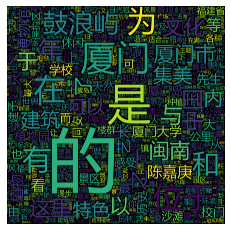

In [73]:
# 绘制词云图
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(i for i in jieba_list)   # 待处理的字符串

# 先下载SimHei.ttf字体，放置到自己的某个目录下
font = r'/usr/share/fonts/myfonts/Consolas+YaHei+hybrid.ttf'

wc = WordCloud(collocations=False, 
               font_path=font, # 路径
               max_words=2000,width=4000,
               height=4000, margin=2).generate(text.lower())

plt.imshow(wc)
plt.axis("off")
plt.show()

wc.to_file('xiamen.png')  # 把词云保存下来